In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
from word2number import w2n

In [19]:
df = pd.read_csv("/Users/bhattbruh/Desktop/ml-playground/data/homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


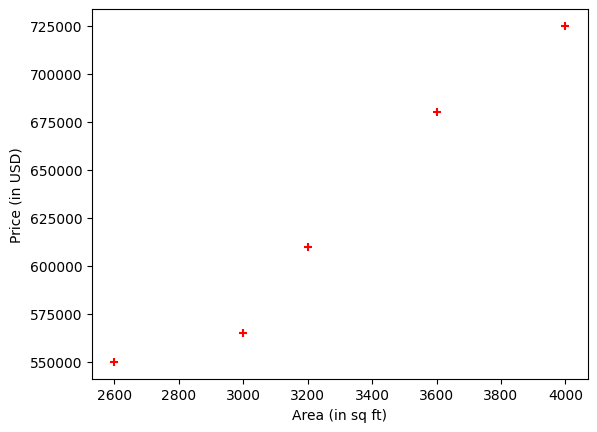

In [4]:
%matplotlib inline
plt.xlabel("Area (in sq ft)")
plt.ylabel("Price (in USD)")
plt.scatter(df.area, df.price, color='red', marker='+')

In [20]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
reg.predict([[3200]])

/Users/bhattbruh/Desktop/ml-playground/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([615136.98630137])

In [10]:
reg.coef_  # slope


array([135.78767123])

In [11]:
reg.intercept_  # y-intercept

np.float64(180616.43835616432)

In [14]:
#y = m*x + b
135.78767123*3200 + 180616.43835616432

615136.9862921643

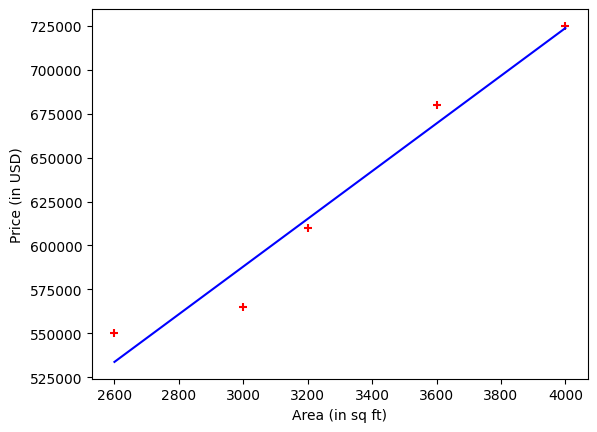

In [22]:
%matplotlib inline
plt.xlabel("Area (in sq ft)")
plt.ylabel("Price (in USD)")
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')


In [15]:
d = pd.read_csv("/Users/bhattbruh/Desktop/ml-playground/data/areas.csv")
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [16]:
p = reg.predict(d)


In [ ]:
d['prices'] = p
d.to_csv("/Users/bhattbruh/Desktop/ml-playground/data/pri", index=False)

In [24]:
df = pd.read_csv("/Users/bhattbruh/Desktop/ml-playground/data/canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [32]:
print(df.columns)  # Check the exact column names

Index(['year', 'per capita income (US$)'], dtype='object')


In [33]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df[['per capita income (US$)']])



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
predicted_income = reg.predict([[2020]])
predicted_income

/Users/bhattbruh/Desktop/ml-playground/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41288.69409442]])

In [38]:
df = pd.read_csv("/Users/bhattbruh/Desktop/ml-playground/data/homeprices 2.csv")
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [42]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [43]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [45]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']], df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [47]:
reg.intercept_

np.float64(221323.00186540402)

In [50]:
reg.predict([[3300,3,40]])


array([532026.98416295])

In [51]:
reg.predict([[4000,2,20]])


array([651716.17161716])

In [53]:
112.06244194*4000 + 23388.88007794*2 + -3231.71790863*20 + 221323.001

651716.1707432801

In [55]:
reg.predict([[2500,4,5]])


array([578876.03748933])

In [118]:
d = pd.read_csv("/Users/bhattbruh/Desktop/ml-playground/data/hiring.csv")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [119]:
d.experience = d.experience.fillna("zero")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [120]:
d.experience = d.experience.apply(w2n.word_to_num)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [121]:
median_testscore = math.floor(d['test_score(out of 10)'].median())
median_testscore

8

In [122]:
d['test_score(out of 10)'] = d['test_score(out of 10)'].fillna(median_testscore)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [123]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [125]:
reg.predict([[2, 9, 6]])  

array([53205.96797671])

In [126]:
reg.predict([[12,10,10]])

array([92002.18340611])